In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import CategoricalNB

In [2]:
df = pd.read_csv("dataFrameFinal.csv")

In [3]:
all_target = ["rarity_COMMON", "rarity_EPIC","rarity_FREE","rarity_LEGENDARY", "rarity_RARE"]
t0=df.rarity_FREE.values
t1=df.rarity_COMMON.values
t2=df.rarity_RARE.values
t3=df.rarity_EPIC.values
t4=df.rarity_LEGENDARY.values
ta=df[all_target].values
variable_quantitative = ["cost","attack","health"]
variable_qualitative = [col for col in df.columns  if col not in variable_quantitative + all_target]
X=df[variable_qualitative+variable_quantitative].values
X_quant=df[variable_quantitative].values
X_qual=df[variable_qualitative].values
X_quant_modif=X_quant
X_quant_modif[X_quant_modif == -1] = 40

Variable quantitative

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, t4, test_size=0.3, stratify=t4)

In [23]:
X_train_modif=X_train
X_train_modif[X_train_modif == -1] = 40

In [24]:
X_test_modif=X_test
X_test_modif[X_test_modif == -1] = 40

In [25]:
gaussian_nb = GaussianNB()

In [26]:
gaussian_nb.fit(X_train_modif,y_train)
predictions = gaussian_nb.predict(X_test)

print(f" ========= target : rarity_LEGENDARY")

print(classification_report(y_test, predictions))

 ========= target : rarity_LEGENDARY
              precision    recall  f1-score   support

           0       0.94      0.51      0.66      1497
           1       0.22      0.80      0.34       257

    accuracy                           0.55      1754
   macro avg       0.58      0.65      0.50      1754
weighted avg       0.83      0.55      0.62      1754



Text(0.5, 1.0, 'target : rarity_LEGENDARY')

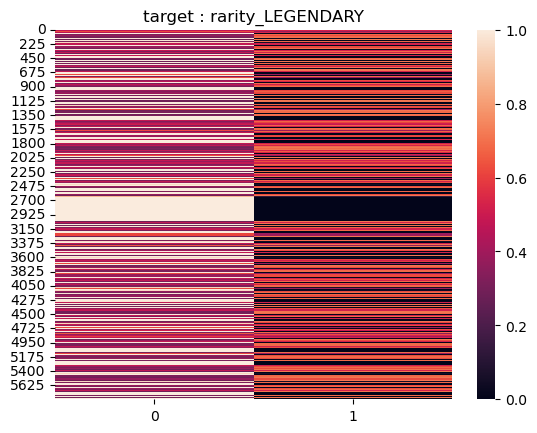

In [27]:
predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
sns.heatmap(predicted_proba)
plt.title("target : rarity_LEGENDARY")

Text(0.5, 1.0, 'cost, health')

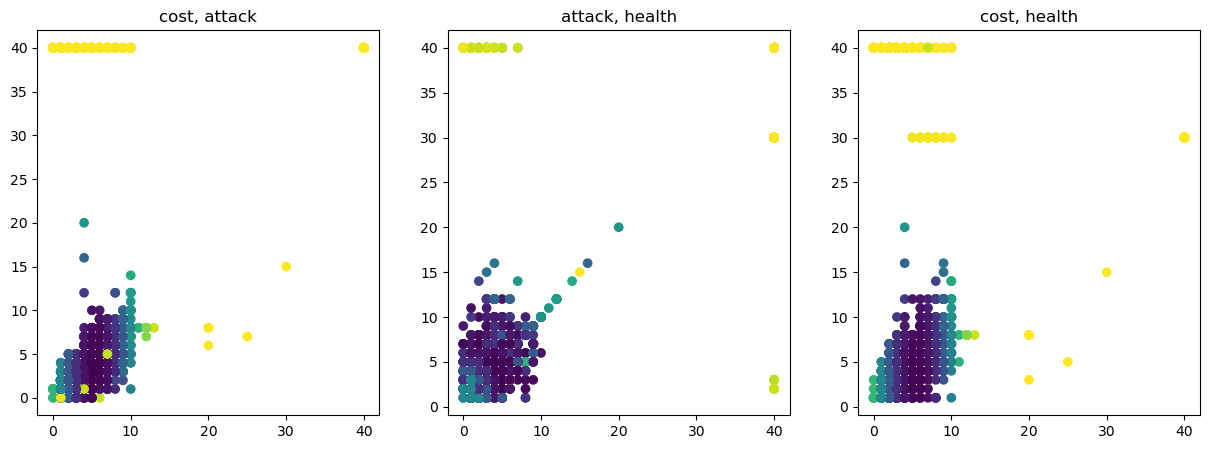

In [28]:
predicted_proba = gaussian_nb.predict_proba(X_quant)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_quant[:,0], X_quant[:,1],c=predicted_proba[:,0])
plt.title("cost, attack")
plt.subplot(1,3,2)
plt.scatter(X_quant[:,1], X_quant[:,2],c=predicted_proba[:,0])
plt.title("attack, health")
plt.subplot(1,3,3)
plt.scatter(X_quant[:,0], X_quant[:,2],c=predicted_proba[:,0])
plt.title("cost, health")

In [12]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t4, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t4, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t4, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t4, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= target : rarity_LEGENDARY")
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")



 ========= target : rarity_LEGENDARY
 ========= Average k-fold validation accuracy total : 0.8455774165953809
 ========= Average k-fold validation precision total : 0.4673043658884043
 ========= Average k-fold validation recall total : 0.39597925391381417
 ========= Average k-fold validation f1-score total : 0.4275445144691433


 ========= target : rarity_FREE
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1566
           1       0.82      0.55      0.66       188

    accuracy                           0.94      1754
   macro avg       0.89      0.77      0.81      1754
weighted avg       0.93      0.94      0.93      1754



Text(0.5, 1.0, 'target : rarity_FREE')

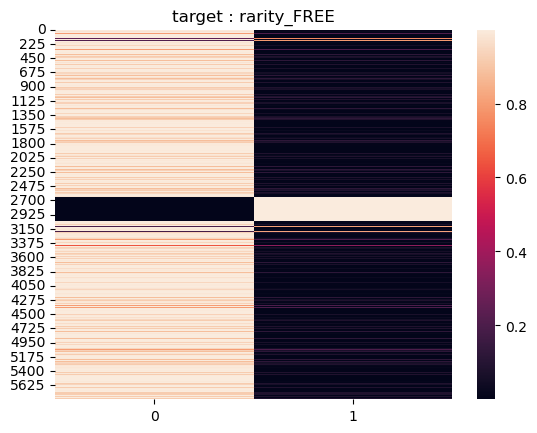

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, t0, test_size=0.3, stratify=t0)
X_train_modif=X_train
X_train_modif[X_train_modif == -1] = 40
X_test_modif=X_test
X_test_modif[X_test_modif == -1] = 40
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_train_modif,y_train)
predictions = gaussian_nb.predict(X_test)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_FREE")
print(classification_report(y_test, predictions))
predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
sns.heatmap(predicted_proba)
plt.title("target : rarity_FREE")

Text(0.5, 1.0, 'cost, health, 1')

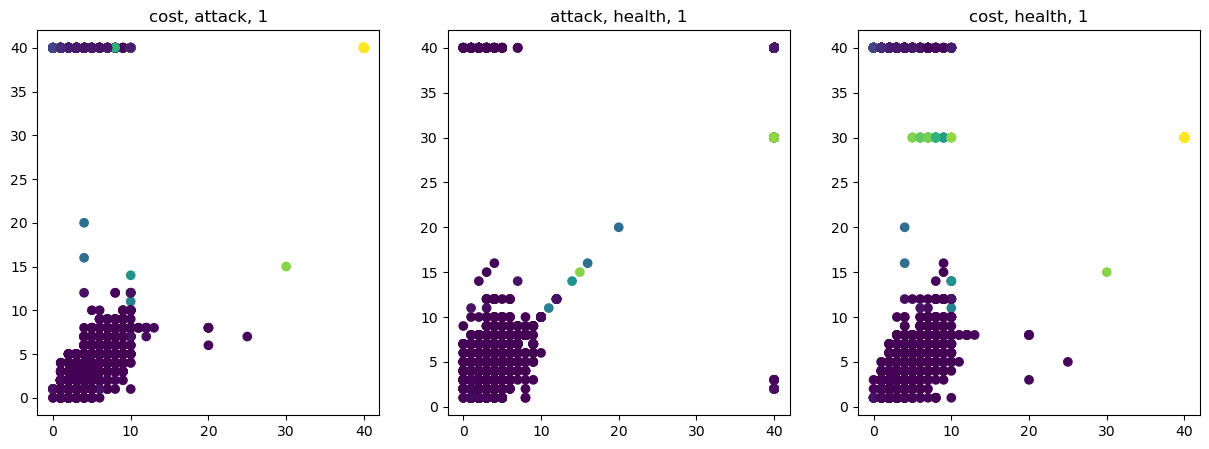

In [34]:
predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_quant[:,0], X_quant[:,1],c=predicted_proba[:,1])
plt.title("cost, attack, 1")
plt.subplot(1,3,2)
plt.scatter(X_quant[:,1], X_quant[:,2],c=predicted_proba[:,1])
plt.title("attack, health, 1")
plt.subplot(1,3,3)
plt.scatter(X_quant[:,0], X_quant[:,2],c=predicted_proba[:,1])
plt.title("cost, health, 1")

In [31]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t0, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t0, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t0, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t0, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= target : rarity_FREE")
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")


 ========= target : rarity_FREE
 ========= Average k-fold validation accuracy total : 0.9409523809523809
 ========= Average k-fold validation precision total : 0.8289254941619378
 ========= Average k-fold validation recall total : 0.5667857923377367
 ========= Average k-fold validation f1-score total : 0.6731174552179078


 ========= target : rarity_COMMON
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1145
           1       0.53      0.42      0.47       609

    accuracy                           0.67      1754
   macro avg       0.63      0.61      0.62      1754
weighted avg       0.66      0.67      0.66      1754

 ========= target : rarity_COMMON
 ========= Average k-fold validation accuracy total : 0.6537040205303679
 ========= Average k-fold validation precision total : 0.5031210898499746
 ========= Average k-fold validation recall total : 0.3991652281205431
 ========= Average k-fold validation f1-score total : 0.44382621135372546


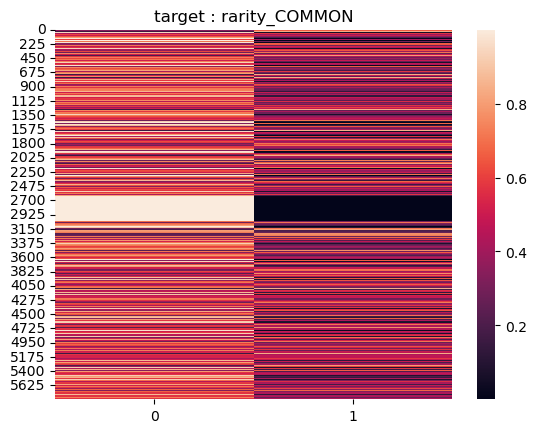

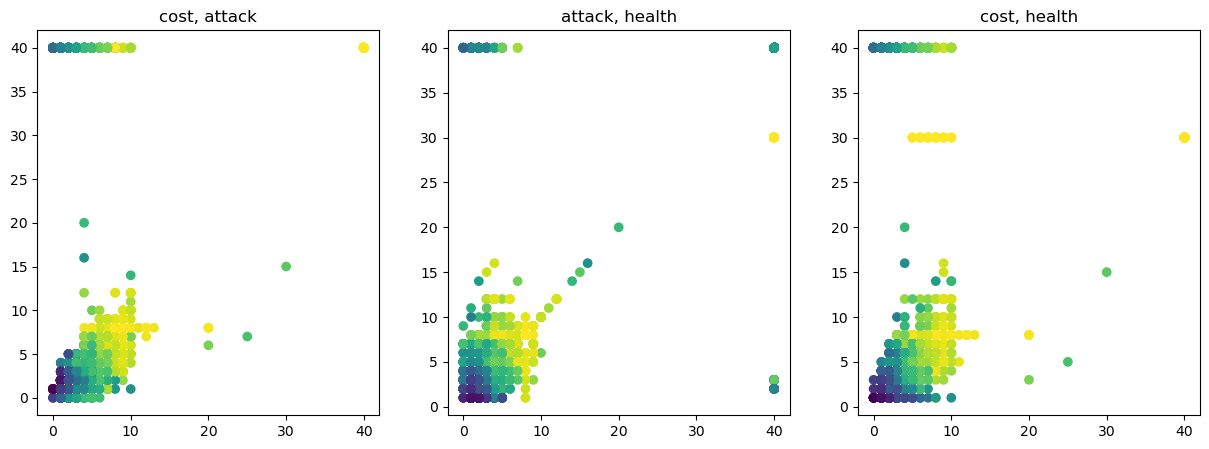

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, t1, test_size=0.3, stratify=t1)
X_train_modif=X_train
X_train_modif[X_train_modif == -1] = 40
X_test_modif=X_test
X_test_modif[X_test_modif == -1] = 40
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_train_modif,y_train)
predictions = gaussian_nb.predict(X_test)
print(f" ========= target : rarity_COMMON")
print(classification_report(y_test, predictions))
predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
sns.heatmap(predicted_proba)
plt.title("target : rarity_COMMON")

predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_quant[:,0], X_quant[:,1],c=predicted_proba[:,0])
plt.title("cost, attack")
plt.subplot(1,3,2)
plt.scatter(X_quant[:,1], X_quant[:,2],c=predicted_proba[:,0])
plt.title("attack, health")
plt.subplot(1,3,3)
plt.scatter(X_quant[:,0], X_quant[:,2],c=predicted_proba[:,0])
plt.title("cost, health")

mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t1, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t1, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t1, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t1, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= target : rarity_COMMON")
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")


 ========= target : rarity_RARE
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1320
           1       0.50      0.01      0.02       434

    accuracy                           0.75      1754
   macro avg       0.63      0.50      0.44      1754
weighted avg       0.69      0.75      0.65      1754



/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kali/.local/lib/python3.11/site-packages/sklea

 ========= target : rarity_RARE
 ========= Average k-fold validation accuracy total : 0.7522897063016825
 ========= Average k-fold validation precision total : 0.41935806785806784
 ========= Average k-fold validation recall total : 0.005776408448240359
 ========= Average k-fold validation f1-score total : 0.01173020274466167


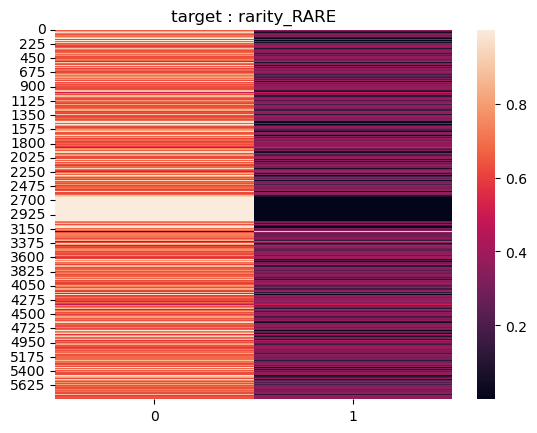

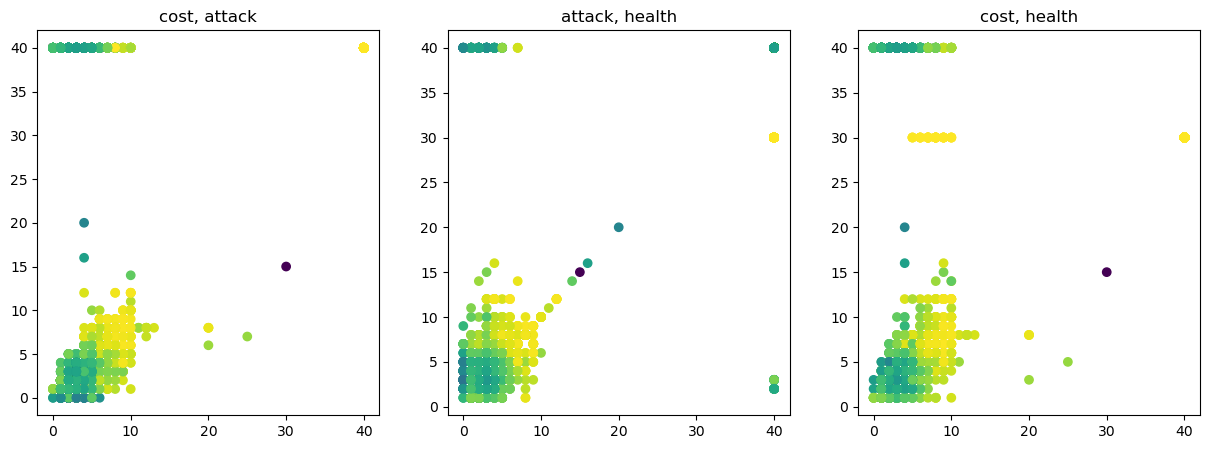

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, t2, test_size=0.3, stratify=t2)
X_train_modif=X_train
X_train_modif[X_train_modif == -1] = 40
X_test_modif=X_test
X_test_modif[X_test_modif == -1] = 40
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_train_modif,y_train)
predictions = gaussian_nb.predict(X_test)
print(f" ========= target : rarity_RARE")
print(classification_report(y_test, predictions))
predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
sns.heatmap(predicted_proba)
plt.title("target : rarity_RARE")

predicted_proba = gaussian_nb.predict_proba(X_quant_modif)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_quant[:,0], X_quant[:,1],c=predicted_proba[:,0])
plt.title("cost, attack")
plt.subplot(1,3,2)
plt.scatter(X_quant[:,1], X_quant[:,2],c=predicted_proba[:,0])
plt.title("attack, health")
plt.subplot(1,3,3)
plt.scatter(X_quant[:,0], X_quant[:,2],c=predicted_proba[:,0])
plt.title("cost, health")

mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t2, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t2, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t2, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t2, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= target : rarity_RARE")
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

 ========= target : rarity_EPIC
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1488
           1       0.71      0.02      0.04       266

    accuracy                           0.85      1754
   macro avg       0.78      0.51      0.48      1754
weighted avg       0.83      0.85      0.78      1754

 ========= target : rarity_COMMON
 ========= Average k-fold validation accuracy total : 0.8458112346735099
 ========= Average k-fold validation precision total : 0.4432290414431975
 ========= Average k-fold validation recall total : 0.025595757461577495
 ========= Average k-fold validation f1-score total : 0.045086587285239045


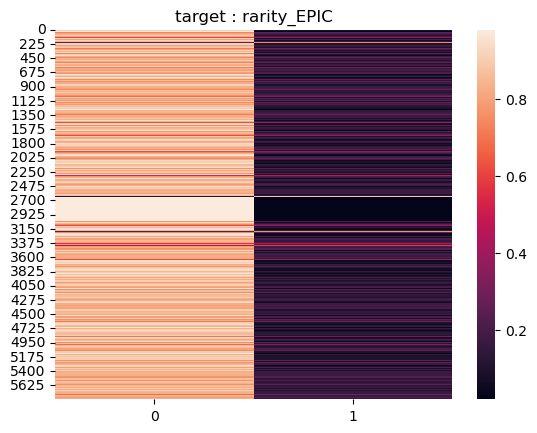

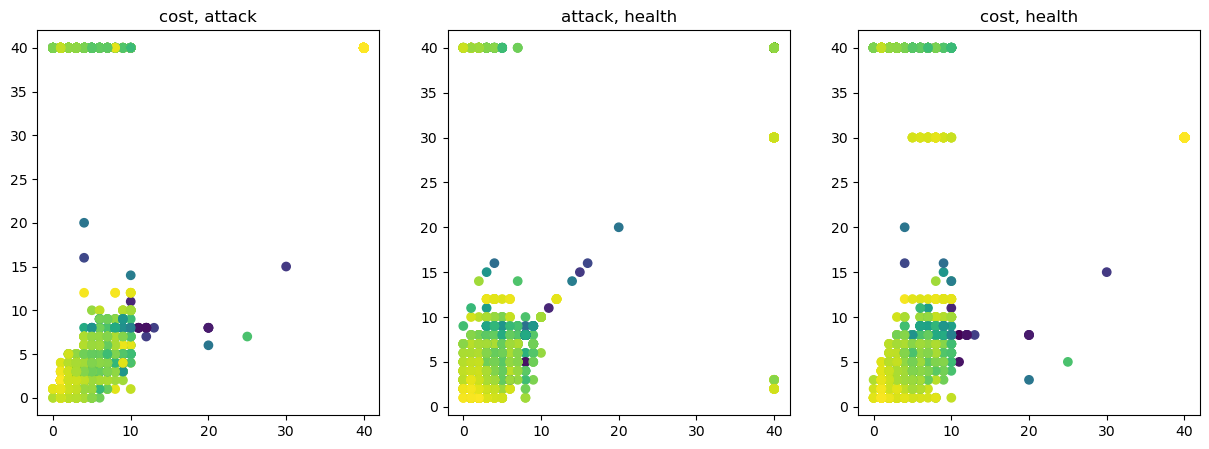

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, t3, test_size=0.3, stratify=t3)
X_train_modif=X_train
X_train_modif[X_train_modif == -1] = 40
X_test_modif=X_test
X_test_modif[X_test_modif == -1] = 40
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_train_modif,y_train)
predictions = gaussian_nb.predict(X_test)
print(" ========= target : rarity_EPIC")
print(classification_report(y_test, predictions))
predicted_proba = gaussian_nb.predict_proba(X_quant)
sns.heatmap(predicted_proba)
plt.title("target : rarity_EPIC")

predicted_proba = gaussian_nb.predict_proba(X_quant)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_quant[:,0], X_quant[:,1],c=predicted_proba[:,0])
plt.title("cost, attack")
plt.subplot(1,3,2)
plt.scatter(X_quant[:,1], X_quant[:,2],c=predicted_proba[:,0])
plt.title("attack, health")
plt.subplot(1,3,3)
plt.scatter(X_quant[:,0], X_quant[:,2],c=predicted_proba[:,0])
plt.title("cost, health")

mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t3, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t3, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t3, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_nb, X=X_quant, y=t3, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= target : rarity_COMMON")
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

Variable qualitative

In [14]:
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_qual,t4)
predictions = gaussian_nb.predict(X_qual)
print(" ========= target : rarity_LEGENDARY")
print(classification_report(t4, predictions))

 ========= target : rarity_LEGENDARY
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4990
           1       0.57      0.37      0.45       855

    accuracy                           0.87      5845
   macro avg       0.73      0.66      0.69      5845
weighted avg       0.85      0.87      0.85      5845



In [38]:
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_qual,t0)
predictions = gaussian_nb.predict(X_qual)
print(" ========= target : rarity_FREE")
print(classification_report(t0, predictions))

 ========= target : rarity_FREE
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5217
           1       0.83      0.75      0.78       628

    accuracy                           0.96      5845
   macro avg       0.90      0.86      0.88      5845
weighted avg       0.95      0.96      0.95      5845



In [39]:
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_qual,t1)
predictions = gaussian_nb.predict(X_qual)
print(" ========= target : rarity_COMMON")
print(classification_report(t1, predictions))

 ========= target : rarity_COMMON
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      3816
           1       0.62      0.40      0.49      2029

    accuracy                           0.71      5845
   macro avg       0.68      0.64      0.64      5845
weighted avg       0.69      0.71      0.69      5845



In [40]:
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_qual,t2)
predictions = gaussian_nb.predict(X_qual)
print(" ========= target : rarity_RARE")
print(classification_report(t2, predictions))

 ========= target : rarity_RARE
              precision    recall  f1-score   support

           0       0.78      0.96      0.87      4399
           1       0.64      0.20      0.30      1446

    accuracy                           0.77      5845
   macro avg       0.71      0.58      0.58      5845
weighted avg       0.75      0.77      0.73      5845



In [41]:
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_qual,t3)
predictions = gaussian_nb.predict(X_qual)

print(" ========= target : rarity_EPIC")

print(classification_report(t3, predictions))

 ========= target : rarity_EPIC
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4958
           1       0.72      0.08      0.15       887

    accuracy                           0.86      5845
   macro avg       0.79      0.54      0.54      5845
weighted avg       0.84      0.86      0.80      5845



Variable combiné

In [83]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quant, t4)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_qual, t4)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quant)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_qual)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, t4)

print(" ========= target : rarity_LEGENDARY")
print(f"===== Accuracy using full dataset{gaussian_full.score(proba_matrix, t4)}")

tpred=gaussian_full.predict(proba_matrix)
precsion = precision_score(t4, tpred)
print(f"===== Precision using full dataset{precision}")
recall = recall_score(t4, tpred)
print(f"===== recall using full dataset{recall}")
f1 = f1_score(t4, tpred)
print(f"===== f1-score using full dataset{f1}")



 ========= target : rarity_LEGENDARY
===== Accuracy using full dataset0.8636441402908469
===== Precision using full dataset0.7184466019417476
===== recall using full dataset0.519298245614035
===== f1-score using full dataset0.5270029673590505


In [68]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t4, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t4, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t4, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=X_quant, y=t4, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

 ========= Average k-fold validation accuracy total : 0.8637639007698887
 ========= Average k-fold validation precision total : 0.53568299307995
 ========= Average k-fold validation recall total : 0.5193317493805981
 ========= Average k-fold validation f1-score total : 0.42822151677631287


In [89]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quant, t0)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_qual, t0)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quant)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_qual)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, t0)
print(" ========= target : rarity_FREE")
print(f"===== Accuracy using full dataset{gaussian_full.score(proba_matrix, t0)}")
tpred=gaussian_full.predict(proba_matrix)
precsion = precision_score(t0, tpred)
print(f"===== Precision using full dataset{precision}")
recall = recall_score(t0, tpred)
print(f"===== recall using full dataset{recall}")
f1 = f1_score(t0, tpred)
print(f"===== f1-score using full dataset{f1}")

mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t0, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t0, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t0, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=X_quant, y=t0, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

 ========= target : rarity_FREE
===== Accuracy using full dataset0.962874251497006
===== Precision using full dataset0.7184466019417476
===== recall using full dataset0.9140127388535032
===== f1-score using full dataset0.841025641025641
 ========= Average k-fold validation accuracy total : 0.9627259766181921
 ========= Average k-fold validation precision total : 0.7783305291501128
 ========= Average k-fold validation recall total : 0.9139865807414417
 ========= Average k-fold validation f1-score total : 0.6744427187757476


In [88]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quant, t1)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_qual, t1)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quant)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_qual)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, t1)
print(" ========= target : rarity_COMMON")
print(f"===== Accuracy using full dataset{gaussian_full.score(proba_matrix, t1)}")
tpred=gaussian_full.predict(proba_matrix)
precsion = precision_score(t1, tpred)
print(f"===== Precision using full dataset{precision}")
recall = recall_score(t1, tpred)
print(f"===== recall using full dataset{recall}")
f1 = f1_score(t1, tpred)
print(f"===== f1-score using full dataset{f1}")


mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t1, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t1, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t1, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=X_quant, y=t1, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

 ========= target : rarity_COMMON
===== Accuracy using full dataset0.7209580838323353
===== Precision using full dataset0.7184466019417476
===== recall using full dataset0.5150320354854608
===== f1-score using full dataset0.5616769685568396
 ========= Average k-fold validation accuracy total : 0.7202338180781296
 ========= Average k-fold validation precision total : 0.6164552445380934
 ========= Average k-fold validation recall total : 0.5153090396192456
 ========= Average k-fold validation f1-score total : 0.5719947714467195


In [87]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quant, t2)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_qual, t2)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quant)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_qual)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, t2)
print(" ========= target : rarity_RARE")
print(f"===== Accuracy using full dataset{gaussian_full.score(proba_matrix, t2)}")

tpred=gaussian_full.predict(proba_matrix)
precsion = precision_score(t2, tpred)
print(f"===== Precision using full dataset{precision}")
recall = recall_score(t2, tpred)
print(f"===== recall using full dataset{recall}")
f1 = f1_score(t2, tpred)
print(f"===== f1-score using full dataset{f1}")


mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t2, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t2, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t2, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=X_quant, y=t2, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

 ========= target : rarity_RARE
===== Accuracy using full dataset0.7635585970915312
===== Precision using full dataset0.7184466019417476
===== recall using full dataset0.3278008298755187
===== f1-score using full dataset0.4068669527896996
 ========= Average k-fold validation accuracy total : 0.7636441402908468
 ========= Average k-fold validation precision total : 0.5371378062749722
 ========= Average k-fold validation recall total : 0.32887244615037303
 ========= Average k-fold validation f1-score total : 0.4146052447786827


In [91]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quant, t3)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_qual, t0)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quant)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_qual)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, t3)
print(" ========= target : rarity_EPIC")
print(f"===== Accuracy using full dataset{gaussian_full.score(proba_matrix, t3)}")
recall = recall_score(t3, tpred)
print(f"===== recall using full dataset{recall}")
f1 = f1_score(t3, tpred)
print(f"===== f1-score using full dataset{f1}")


tpred=gaussian_full.predict(proba_matrix)
precsion = precision_score(t3, tpred)
print(f"===== Precision using full dataset{precision}")

mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0
for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t3, scoring="accuracy", cv=kfold)
    mean_acc = mean_acc + scores.mean() 
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t3, scoring="precision", cv=kfold)
    mean_prec = mean_prec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=t3, scoring="recall", cv=kfold)
    mean_rec = mean_rec + scores.mean()
    scores = cross_val_score(estimator=gaussian_full, X=X_quant, y=t3, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + scores.mean()
    i=i+1
print(f" ========= Average k-fold validation accuracy total : {mean_acc / i}")
print(f" ========= Average k-fold validation precision total : {mean_prec / i}")
print(f" ========= Average k-fold validation recall total : {mean_rec / i}")
print(f" ========= Average k-fold validation f1-score total : {mean_f1 / i}")

 ========= target : rarity_EPIC
===== Accuracy using full dataset0.8374679213002566
===== recall using full dataset0.0552423900789177
===== f1-score using full dataset0.0603448275862069
===== Precision using full dataset0.7184466019417476
 ========= Average k-fold validation accuracy total : 0.8334074707727402
 ========= Average k-fold validation precision total : 0.30906600780840415
 ========= Average k-fold validation recall total : 0.06917660797310085
 ========= Average k-fold validation f1-score total : 0.03494395110758387
